In [9]:
from pathlib import Path
import chromadb
import sys
import os

# Add the parent directory to sys.path so 'src' can be imported
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

from src.config import db_configuration
from src.vectorized_database import VectorizedDatabase
project_root = "/home/afalceto/news_rs/"
db_path = db_configuration["db_path"]
collection_name = db_configuration["collection_name"]

client = VectorizedDatabase(
    persist_directory=f"{project_root}/db/{db_path}",
    collection_name=collection_name
)




In [10]:

collection = client.get_collection()

In [11]:
results = collection.get(where={"topic": "Politics"})
print(results)

{'ids': ['99063032-adb0-4d14-915f-6d44924e5479', 'ccbd3f9c-7246-474b-8428-c4dffe89a90e', '69a7e135-3847-44c6-a263-f831800f4398', '6d8a84cc-9da0-43cd-9989-de4bd37b4a01', 'f5736f62-8f13-40ea-8af6-123723fc7012', '01ad6e54-3dd7-4a46-9425-2738f12386b9', 'c4f078fd-a1df-4e68-ad77-8e933841a6bd', 'f841cab0-0807-44b2-8711-7192af96d1c1', '3a3a3507-504c-4edf-a6c4-873abae3b3cb', '4f592527-d826-4587-aaaa-ed7a5b6b035c', 'b02c77ee-e611-467b-88cf-de8b9d61edf6', '0d795d62-a398-42e9-abec-0a94c8cba5f6', '1e0c3879-435d-4b33-af53-b99500949dde', 'e56f5734-dbaf-4c0a-9444-a52adb91cbdf', 'b7cf9a84-9639-4f9e-9871-044101ed0145', 'd40a21f8-3229-4ea6-b61d-0fe25430767e', 'cf561f0d-f428-4ba3-a936-5c500a289fb3', '2c93f105-8086-46a1-999d-79f5bd9787a9', '130c61b5-425b-4635-b4d6-1637709ab7c5', '78cb2a98-1d6e-444a-9109-777999d0b9ea'], 'embeddings': None, 'documents': ['The administration has not put forward a clear legal authority to compel drugmakers to reduce their prices.', 'The physical test, which included a one-mile

In [ ]:
client.delete_collection(name=collection_name)

In [6]:
# Get all embeddings (and optionally, associated metadata)
results = collection.get(include=["embeddings", "metadatas", "documents"])

# Now you have:
embeddings = results["embeddings"]
documents = results["documents"]  # optional, for labeling
metadatas = results["metadatas"]

In [15]:
documents_dict = collection.get()

documents = documents_dict["documents"][0:5]
ids = documents_dict["ids"][0:5]
metadatas = documents_dict["metadatas"][0:5]

for doc, metadata, doc_id in zip(documents, metadatas, ids) :
    
    print(metadata.get("topic"), "-->", doc_id)

    metadata.pop("topic", None)

    collection.delete(ids=[doc_id])
    collection.add(
        documents=[doc],
        metadatas=[metadata],
        ids=[doc_id]
    )


Finance --> e9e421c9-db73-4bd0-90f9-7a236634d1c6
Politics --> 78cb2a98-1d6e-444a-9109-777999d0b9ea
Technology --> 9bada4a6-5563-44e4-aad3-4fc46af74b4d
Travel --> da564042-f2ee-4369-b73f-4e42168b96c1
None --> 9f0d90b8-a9bf-4862-94ac-290d4a77a806


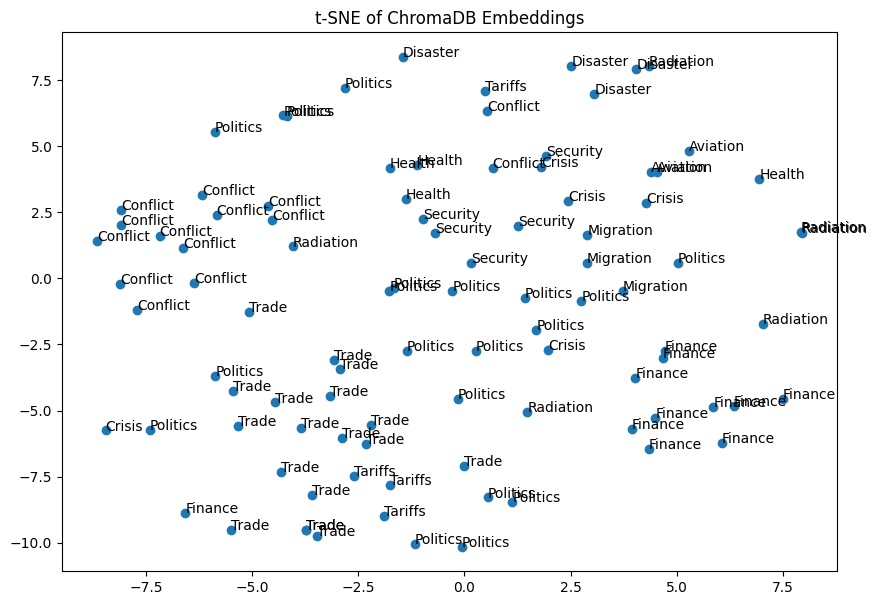

In [8]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Dimensionality reduction
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
embeddings_2d = tsne.fit_transform(embeddings)

# Plot
plt.figure(figsize=(10, 7))
plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1])

# Optional: Add labels if you want to see what each point is
for i, metadata in enumerate(metadatas):
    plt.annotate(metadata['topic'], (embeddings_2d[i, 0], embeddings_2d[i, 1]))  # truncate labels
plt.title("t-SNE of ChromaDB Embeddings")
plt.show()


In [4]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

n_components = 50
pca = PCA(n_components=n_components)
embeddings_reduced = pca.fit_transform(embeddings)


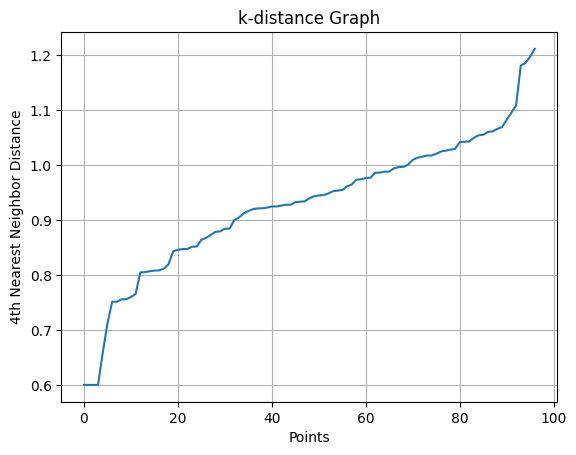

In [5]:
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import numpy as np

neighbors = NearestNeighbors(n_neighbors=4)  # if min_samples=5
neighbors_fit = neighbors.fit(embeddings_reduced)
distances, _ = neighbors_fit.kneighbors(embeddings_reduced)
distances = np.sort(distances[:, 3])
plt.plot(distances)
plt.title("k-distance Graph")
plt.xlabel("Points")
plt.ylabel("4th Nearest Neighbor Distance")
plt.grid(True)
plt.show()


In [35]:
for i in range(n_clusters):
    print(len(clusters[i]))

13
6
10
4
12
16
12
4
17
3
